___
# Análise Exploratória: Duas variáveis quantitativas
___

## Aula 06


**Preparo Prévio:**
1. Leitura prévia necessária: Montgomery et al (5ª. Edição): Seção 2.6 (pág. 46) e Exemplo 6.1 (pág. 306).

**Hoje:**
1. Analisar, graficamente, a associação entre duas variáveis quantitativas.
2. Compreender a medida nomeada coeficiente de covariância, no que tange ao significado da fórmula e uso do valor resultante para descrever associação entre variáveis.
3. Avaliar vantagens e desvantagens do coeficiente de covariância e buscar alternativa que compense seu mau uso (coeficiente de correlação).
4. Interpretar, descritivamente, valores dos coeficientes linear e angular para qualquer problema prático.
5. Fechamento do conteúdo.

**Próxima aula:**
1. Estudo para PROJETO 1!

___
## <font color='blue'>Mundo</font>

A análise bidimensional tem como objetivo encontrar associação ou relação entre as variáveis quantitativas. Essas relações podem ser identificadas através de gráficos ou medidas numéricas. Entende-se por associação a mudança de opinião sobre o comportamento de uma variável na presença de informação sobre a segunda variável.

Inicialmente, a base de dados `Mundo.txt` será explorada com intuito de entender a associação entre algumas de suas variáveis quantitativas. Esse conjunto de dados contém alguns indicadores socioeconômicos referentes ao ano de 2008 para 85 países, os quais são:  
X1: população em milhares de habitantes  
X2: densidade populacional  
X3: % de população urbana  
X4: expectativa de vida feminina  
X5: expectativa de vida masculina  
X6: crescimento populacional  
X7: mortalidade infantil  
X8: PIB per capita  
X9: % de mulheres alfabetizadas  
X10: população em 100.000 habitantes  

Responda:

1. Um gráfico de dispersão pode ser utilizado para compreender a relação entre duas variáveis quantitativas. Não necessariamente essa relação implica em causalidade (https://economiadependrive.wordpress.com/2014/09/25/correlacao-nao-implica-em-causalidade/)  e, em alguns casos, pode se tratar de uma relação espúria (http://www.tylervigen.com/spurious-correlations). Construa um gráfico de dispersão entre as variáveis X3 (eixo das abscissas) e X4 (eixo das ordenadas), em que cada ponto ⧫ representa um país da base de dados de acordo com o par de coordenadas nessas duas variáveis quantitativas. Repita considerando as variáveis  X3 e X5, as variáveis X3 e X6  e as variáveis X3 e X7. Para cada um dos quatro gráficos, descreva a relação entre as variáveis.

2. O gráfico de dispersão é uma ferramenta descritiva simples, porém útil para examinar uma possível relação entre variáveis quantitativas. A literatura estatística apresenta uma medida, nomeada de covariância, cujo sinal pode ser um indicativo do tipo de associação linear: positiva, se maior que zero; negativa, se menor que zero; e ausente de associação linear, se igual a zero. Calcule a covariância para cada par de variáveis utilizadas nos gráficos acima. Contraste as interpretações gráficas e os resultados das covariâncias. É possível perceber que essa medida é capaz de traduzir o sinal da associação entre as variáveis quantitativas? Por quê? Justifique a sua resposta. Observação: faça uma explicação dizendo também porque a covariância é capaz de mensurar corretamente uma possível associação linear.
___

In [2]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\rauli\SharePoint\Fabio Roberto de Miranda\data_science\2017.2\Aulas K\Aula06 - Variáveis Quantitativas - Gráfico de dispersão e Medidas de associação


In [3]:
Mundo = pd.read_excel('Mundo.xlsx')
Mundo.head()

,i,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,20500,25.0,18,44,45,2.80,168.0,205,14,0.205
1,2,33900,12.0,86,75,68,1.30,25.6,3408,95,0.339
2,3,3700,126.0,68,75,68,1.40,27.0,5000,100,0.037
3,4,17800,2.3,85,80,74,1.38,7.3,16848,100,0.178
4,5,7400,86.0,54,75,67,1.40,35.0,3000,100,0.074


___
*Responda:*

1) Um gráfico de dispersão pode ser utilizado para compreender a relação (ou seja, associação) entre duas variáveis quantitativas. Observando os quatro gráficos de dispersão a seguir feitos com algumas das variáveis do conjunto de dados, como você descreveria a relação entre elas?

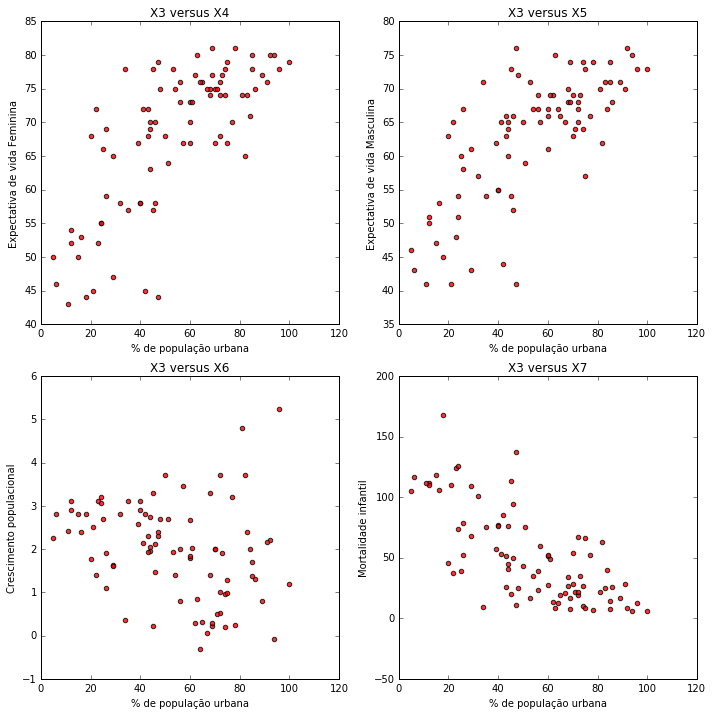

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(Mundo.X3, Mundo.X4, c='red', alpha=0.8)
plt.title('X3 versus X4')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Feminina')

plt.subplot(222)
plt.scatter(Mundo.X3, Mundo.X5, c='red', alpha=0.8)
plt.title('X3 versus X5')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Masculina')

plt.subplot(223)
plt.scatter(Mundo.X3, Mundo.X6, c='red', alpha=0.8)
plt.title('X3 versus X6')
plt.xlabel('% de população urbana')
plt.ylabel('Crescimento populacional')

plt.subplot(224)
plt.scatter(Mundo.X3, Mundo.X7, c='red', alpha=0.8)
plt.title('X3 versus X7')
plt.xlabel('% de população urbana')
plt.ylabel('Mortalidade infantil')

plt.tight_layout()
plt.show()

___
*Responda:*

2) Medida de covariância: $$\mathrm{Cov}(X, Y) = \frac{1}{n} \sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y}) \quad\quad\quad\quad (1)$$

Calcule a covariância para cada par de variáveis utilizadas nos gráficos acima. Contraste as interpretações gráficas e os resultados das covariâncias. É possível perceber que essa medida é capaz de traduzir o sinal da associação entre as variáveis quantitativas? Por quê? Justifique a sua resposta. Observação: faça uma explicação dizendo também porque a covariância é capaz de mensurar corretamente uma possível associação linear.

In [7]:
print("Covariância entre X3 e X4:",np.cov(Mundo.X3,Mundo.X4)[0,1])  #Ou este comando Mundo.X3.cov(Mundo.X4)
print("Covariância entre X3 e X5:",np.cov(Mundo.X3,Mundo.X5)[0,1])
print("Covariância entre X3 e X6:",np.cov(Mundo.X3,Mundo.X6)[0,1])
print("Covariância entre X3 e X7:",np.cov(Mundo.X3,Mundo.X7)[0,1])


Covariância entre X3 e X4: 194.349859944
Covariância entre X3 e X5: 166.230112045
Covariância entre X3 e X6: -6.84632212885
Covariância entre X3 e X7: -671.678008403


In [8]:
print("Correlação entre X3 e X4:",np.corrcoef(Mundo.X3,Mundo.X4)[0,1])  #Ou este comando Mundo.X3.corr(Mundo.X4)
print("Correlação entre X3 e X5:",np.corrcoef(Mundo.X3,Mundo.X5)[0,1])
print("Correlação entre X3 e X6:",np.corrcoef(Mundo.X3,Mundo.X6)[0,1])
print("Correlação entre X3 e X7:",np.corrcoef(Mundo.X3,Mundo.X7)[0,1])

Correlação entre X3 e X4: 0.747773284605
Correlação entre X3 e X5: 0.729723116276
Correlação entre X3 e X6: -0.25355939334
Correlação entre X3 e X7: -0.723770233147


___

3) Ajuste de reta apenas para interpretação dos coeficientes:

A solução pode ser pelo ajuste de uma reta:

<img src="regressao.png">

E, no caso, uma reta depende de um coeficiente linear (*a*) e de um coeficiente angular (*b*) e pode ser matematicamente expressa por:

$$\hat{y} = a + bx$$

Ainda sem entrar em detalhes, esses coeficientes devem ser obtidos a partir dos dados utilizando algumas medidas-resumo pelas seguintes expressões:

$$b = \frac{\mathrm{Cov}(X, Y)}{\mathrm{Var}(X)}$$

$$a = \overline{y} - b\overline{x}$$


*Responda:*

3.1) Calcule esses coeficientes linear e angular e interprete-os para o problema em questão.

Ajuste linear entre X3 e X4:
Coeficiente linear: 50.2039447956
Coeficiente angular: 0.330900882683


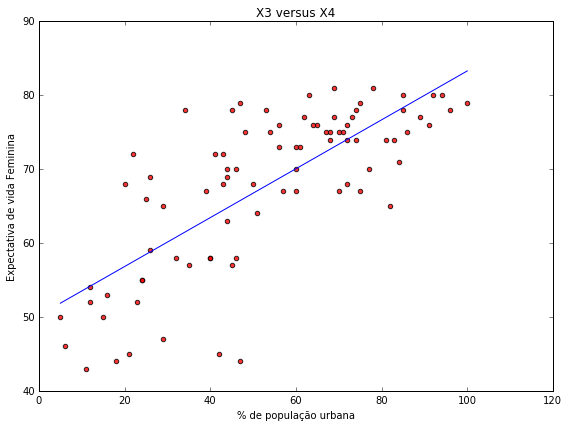

In [9]:
# Regressão entre X3 e X4 com ajuste linear

a = Mundo.X3.cov(Mundo.X4) / Mundo.X3.var()
b = Mundo.X4.mean() - a*Mundo.X3.mean()

print('Ajuste linear entre X3 e X4:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

fig = plt.figure(figsize=(8, 6))
plt.scatter(Mundo.X3, Mundo.X4, c='red', alpha=0.8)
plt.title('X3 versus X4')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Feminina')

plt.plot((Mundo.X3.min(), Mundo.X3.max()), (a*Mundo.X3.min()+b, a*Mundo.X3.max()+b), color='blue')

plt.tight_layout()
plt.show()

*Responda:*

3.2) Considerando essa reta ajustada, qual deve ser a expectativa de vida feminina em um país com 73% da população vivendo na região urbana?

In [10]:
print('Valor estimado para Expectativa de vida Feminina quando %população urbana igual a 73 é igual a', np.round(a*73+b,2), 'anos')

Valor estimado para Expectativa de vida Feminina quando %população urbana igual a 73 é igual a 74.36 anos
